## Аналитика Яндекс.Афиши

### [Содержание](#Содержание)  <a name="Содержание"></a>
#### [Описание проекта](#Описаниепроекта)  
#### [Описание данных](#Описаниеданных)  
### [Шаг 1. Загрузка данных и подготовка их к анализу](#Шаг1)  
  
 [     1.1 Таблица visits](#Шаг1.1)   
 [     1.2 Таблица orders](#Шаг1.2)   
[     1.3 Таблица costs](#Шаг1.3)  
#### [     1.4 Вывод](#Шаг1.4)  
### [Шаг 2. Построить отчёты и посчитать метрики](#Шаг2)   
- 
#### [      2.1 Продукт](#Шаг2.1)   
[      2.1.1 Количество пользователей в день, неделю, месяц](#Шаг2.1.1)   
[      2.1.2 Количество сессий в день](#Шаг2.1.2)  
[      2.1.3 Длительность одной сессии](#Шаг2.1.3)  
[2.1.4 Как часто люди возвращаются](#Шаг2.1.4)    
- 
#### [      2.2 Продажи](#Шаг2.2)  
[2.2.1 Когда люди начинают покупать?](#Шаг2.2.1)  
[2.2.2 Количество покупок за период](#Шаг2.2.2)  
[2.2.3  Средний чек за месяц](#Шаг2.2.3)  
[2.2.4 Сколько денег приносят? (LTV)](#Шаг2.2.4)
- 
#### [ 2.3 Маркетинг](#Шаг2.3 )  
 [2.3.1 Расходы: всего / на каждый источник / по времени](#Шаг2.3.1)  
[2.3.2 Стоимость привлечения одного покупателя из каждого источника](#Шаг2.3.2)  
[2.3.3 Окупаемость расходов (ROI)](#Шаг2.3.3)  

  
#### [     2.4 Вывод](#Шаг2.4)

### [Шаг 3. Вывод: рекомендации маркетологам, куда и сколько стоит вкладывать денег](#Шаг3)  
 

### Шаг 1. Загрузка данных и подготовка их к анализу<a name="Шаг1"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

#### Таблица **visits**<a name="Шаг1.1"></a>    

In [3]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
#Переименовываю столбцы
visits = visits.rename(columns={'End Ts': 'session_end', 'Start Ts': 'session_start'})
visits.columns = visits.columns.str.lower()


In [6]:
#Перевод столбцов в формат времени
visits['session_end'] = pd.to_datetime(visits['session_end'], format = '%Y-%m-%d %H:%M:%S')
visits['session_start'] = pd.to_datetime(visits['session_start'], format = '%Y-%m-%d %H:%M:%S')

In [7]:
#Делю числа на месяца, дни и даты
visits['session_start_date'] = visits['session_start'].dt.date
visits['session_start_week'] = visits['session_start'].dt.week
visits['session_start_month'] = visits['session_start'].dt.month
visits['session_start_year'] = visits['session_start'].dt.year

visits['session_end_date'] = visits['session_end'].dt.date
visits['session_end_week'] = visits['session_end'].dt.week
visits['session_end_month'] = visits['session_end'].dt.month

In [8]:
#Проверка на пропуски
visits.isna().sum()


device                 0
session_end            0
source id              0
session_start          0
uid                    0
session_start_date     0
session_start_week     0
session_start_month    0
session_start_year     0
session_end_date       0
session_end_week       0
session_end_month      0
dtype: int64

In [9]:
#Проверка на дубликаты
visits.duplicated().sum()

0

#### Таблица **orders**<a name="Шаг1.2"></a>    

In [10]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [12]:
#Переименовываю столбцы
orders = orders.rename(columns={'Buy Ts': 'date_of_purchase'})
orders.columns = orders.columns.str.lower()

In [13]:
#Перевод столбца в формат времени
orders['date_of_purchase'] = pd.to_datetime(orders['date_of_purchase'], format = '%Y-%m-%d %H:%M:%S')

In [14]:
#Делю числа на месяца, дни и даты
orders['date_date_of_purchase'] = orders['date_of_purchase'].dt.date
orders['month_of_purchase'] = orders['date_of_purchase'].dt.month
orders['week_of_purchase'] = orders['date_of_purchase'].dt.week

#### Таблица **costs**<a name="Шаг1.3"></a>   

In [15]:
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [17]:
#Переименовываю столбцы
costs = costs.rename(columns={'dt': 'date'})
costs.columns = costs.columns.str.lower()

In [18]:
#Перевод столбца в формат времени
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d %H:%M:%S')

In [19]:
#Делю числа на месяца, дни и даты
costs['date_month'] = costs['date'].dt.month
costs['date_week'] = costs['date'].dt.week


#### Вывод:<a name="Шаг1.4"></a>    
Столбцы с датами переведены в формат даты и переименованы, числа разбиты на месяца, недели и даты.  
Пропуски и дубликаты в данных отсутствуют.


### Шаг 2. Построить отчёты и посчитать метрики<a name="Шаг2"></a>    

#### 2.1 Продукт <a name="Шаг2.1"></a>    

##### 2.1.1 Количество пользователей в день, неделю, месяц<a name="Шаг2.1.1"></a>    


In [20]:
#Группируем данные по уникальным пользователям и нахожу среднее для определения количества пользователей
dau_total = visits.groupby('session_start_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_start_year', 'session_start_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_start_year', 'session_start_month']).agg({'uid': 'nunique'}).mean()
print('Количество пользователей в день:', int(dau_total))
print('Количество пользователей в неделю:', int(wau_total))
print('Количество пользователей в месяц:', int(mau_total))

Количество пользователей в день: 907
Количество пользователей в неделю: 5716
Количество пользователей в месяц: 23228


In [70]:
#Функция построения графиков, а также средних значений числа пользователей в день/неделю/месяц

def visits_counter(x):
    result = visits.sort_values(by = x).groupby(x).agg({'uid':'nunique'})
    result.plot(grid = True, figsize = (15, 6))
    
    return result.describe()

,uid
count,364.000000
mean,907.991758
std,370.513838
min,1.000000
25%,594.000000
50%,921.000000
75%,1173.000000
max,3319.000000


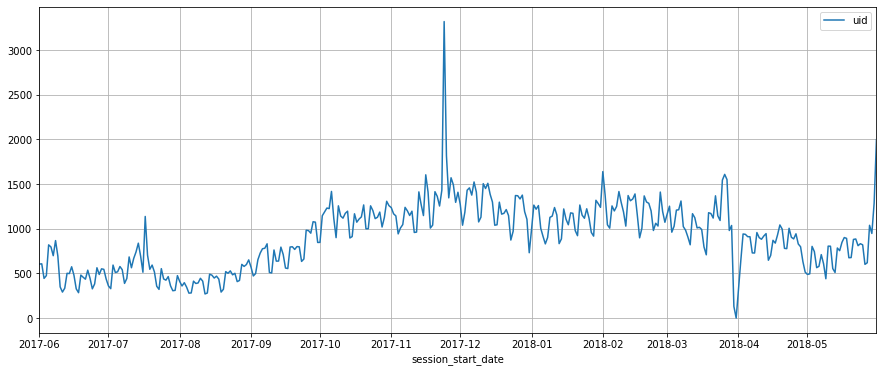

In [71]:
#Данные и график количества пользователей в день
visits_counter('session_start_date')

In [72]:
#Посмотрим на аномальные показатели
anomaly = visits.groupby('session_start_date').agg({'uid':'nunique'}) 
anomaly[anomaly['uid'] >= 2000]

,uid
session_start_date,
2017-11-24,3319


Выделяется максимум 3319 - 2017-11-24, возможно, в этот день проводилась какая-то акция, маркетологи запустили активную рекламную компанию

,uid
count,52.000000
mean,5825.288462
std,2004.308969
min,2364.000000
25%,4128.750000
50%,6233.000000
75%,7420.750000
max,10586.000000


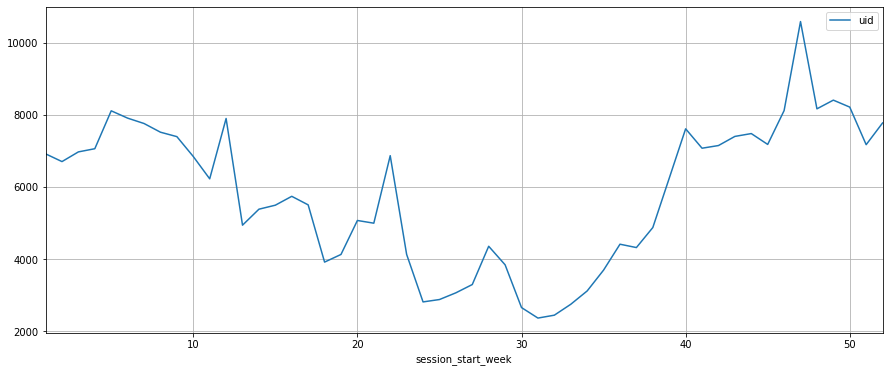

In [73]:
#Данные и график количества пользователей в неделю
visits_counter('session_start_week')

Наблюдается падение прихода пользователей к 30 неделе, однако потом график растет, что показывает на повышенный интерес, это может может быть связано с сезонностью или проведением акций.

,uid
count,12.000000
mean,23228.416667
std,7546.380462
min,11631.000000
25%,17777.000000
50%,24240.500000
75%,28984.750000
max,32797.000000


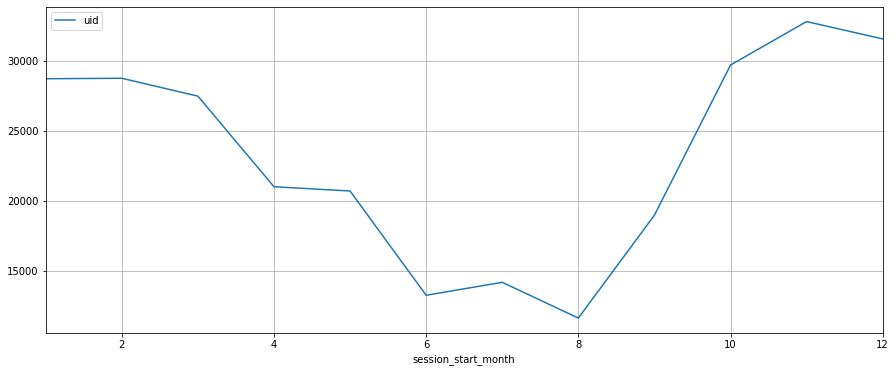

In [74]:
#Данные и график количества пользователей в месяц
visits_counter('session_start_month')

Ближе к осени пользователей приходит больше и весной количество пользователей падает, кажется логичным, так как в хорошую погоду люди проводят больше времени на свежем воздухе, а вот когда на улице холодно - предпочитают находиться в помещениях, то есть посещать музеи, кинотеатры, театры.

##### 2.1.2 Количество сессий в день<a name="Шаг2.1.2"></a> 


count     364.000000
mean      987.362637
std       418.994796
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: session_start_date, dtype: float64

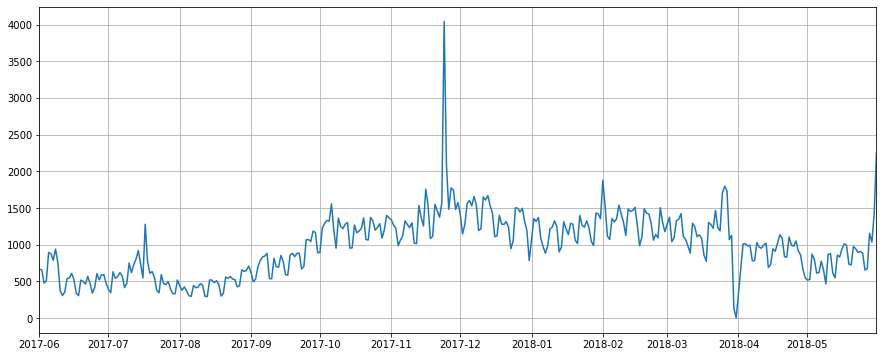

In [26]:
session_number = visits['session_start_date'].value_counts()
session_number.plot(grid = True, figsize = (15,6))
session_number.describe()

Количество сессий в день приближено к количеству пользователей в день, похоже, чаще всего пользователи заходят на сайт по-одному разу, либо  никак не авторизуются и каждый последующий заход на сайт пользователю присваивается новый uid.

##### 2.1.3 Длительность одной сессии<a name="Шаг2.1.3"></a> 


In [169]:

visits['duration'] = visits['session_end'] - visits['session_start']

visits['duration'].describe()

count                    359400
mean     0 days 00:10:43.025687
std      0 days 00:16:37.127760
min           -1 days +23:14:00
25%             0 days 00:02:00
50%             0 days 00:05:00
75%             0 days 00:14:00
max             0 days 11:51:00
Name: duration, dtype: object

Минимальная длительность сессии -1 days +23:14:00, похоже на ошибку в программе регистрации начала и окончания сессии;  
В среднем на сайте проводят 10 минут

##### 2.1.4 Как часто люди возвращаются<a name="Шаг2.1.4"></a> 

In [28]:
#Определяю дату, когда пользователь впервые проявил активность
first_activity_date = visits.groupby('uid')['session_start'].min()
first_activity_date.name = 'first_activity_date'

In [29]:
#Объединяю его с исходным датафреймом 

visits = visits.merge(first_activity_date, on = 'uid')

In [30]:
#Привожу данные к формату дата время помесячно
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month'] = visits['session_start'].astype('datetime64[M]')

#рассчитываю lifetime пользователя в рамках когорты
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [31]:
#Группирую данные по когорте и lifetime
#Считаю для каждой когорты количество активных пользователей на определённую неделю жизни

cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [32]:
#Вывожу исходное количество пользователей в когорте на нулевую неделю
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]

initial_users_count.head()

,first_activity_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [33]:
#Переименовываю столбец
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [34]:
#Объединяю данные по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

In [35]:
# Рассчитываю Retention Rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [36]:
#Сводная таблица Retention Rate 
retention_pivot = cohorts.pivot_table(index='first_activity_month',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum')
retention_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.0786635,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07-01,1.0,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08-01,1.0,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09-01,1.0,0.0854885,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10-01,1.0,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11-01,1.0,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12-01,1.0,0.0558018,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01-01,1.0,0.0597153,0.0393388,0.0249735,0.020244,,,,,,,
2018-02-01,1.0,0.0570798,0.0254539,0.0200928,,,,,,,,


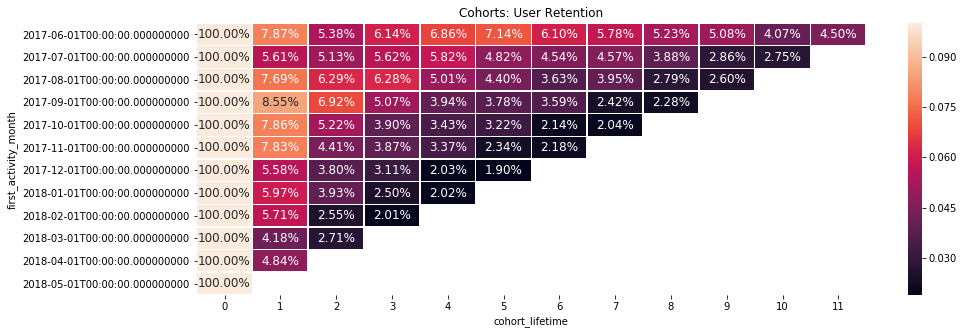

In [37]:
#Тепловая карта Retention Rate 
plt.figure(figsize=(15,5))
plt.title('Cohorts: User Retention')

sns.heatmap(retention_pivot, 
            annot=True, 
            fmt='.2%',
            vmax=0.10, 
            linewidths=.5,
            annot_kws={"size": 12})


Тепловая карта показывает, что пользователи практически не возвращаются, лишь 5-7 % пользователей заходят на сайт через месяц после первой активности, возможно, это связано с тем;   
После второго месяца возвращается примерно тоже количество людей и лишь после продолжительного времени процент вернувшихся пользователей падает до 2 - 2.75;
Стоит заметить, что первая когорта показывает наилучший результат среди прочих;
Как и было ранее отмечено, больше всего пользователей приходят в период с августа по ноябрь.

#### 2.2 Продажи<a name="Шаг2.2"></a> 

##### 2.2.1 Когда люди начинают покупать?<a name="Шаг2.2.1"></a> 


In [38]:
first_visit = visits.groupby('uid')['session_start'].min().to_frame()

In [39]:
first_order = orders.groupby('uid')['date_of_purchase'].min().to_frame()
first_order['date_of_purchase'] = pd.to_datetime(first_order['date_of_purchase'], format = '%Y-%m-%d')

In [40]:
first_order = first_order.join(first_visit, on = 'uid')

In [41]:
first_order['order_time'] = first_order['date_of_purchase'] - first_order['session_start']
first_order['order_time'].describe()

count                      36523
mean     16 days 21:40:10.550064
std      47 days 01:44:46.481416
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:16:00
75%              2 days 00:17:00
max            363 days 07:04:00
Name: order_time, dtype: object

В среднем от визита до покупки проходит 16 дней 21 час 40 минут, минимум - 0, вероятно, ошибка в записи данных;  
Медианное значение - 16 минут;  
Дольше всех покупатель совершал покупку почти год - 363 дня.


##### 2.2.2 Количество покупок за период<a name="Шаг2.2.2"></a> 


In [42]:
#Количество заказов в день
daily_orders = orders['date_date_of_purchase'].value_counts().describe().to_frame()
#Количество заказов в неделю
weekly_orders = orders['week_of_purchase'].value_counts().describe().to_frame()
#Количество заказов в месяц
monthly_orders = orders['month_of_purchase'].value_counts().describe().to_frame()

In [43]:
#Объединение таблиц с количеством заказов в день/неделю/месяц
orders_sum = monthly_orders.join(weekly_orders)
orders_sum = orders_sum.join(daily_orders)

orders_sum

,month_of_purchase,week_of_purchase,date_date_of_purchase
count,12.000000,52.000000,364.000000
mean,4201.250000,969.519231,138.502747
std,1511.861052,397.630457,76.858480
min,1807.000000,314.000000,1.000000
25%,3045.500000,658.500000,82.750000
50%,4533.500000,997.500000,136.000000
75%,5409.250000,1270.500000,177.000000
max,6218.000000,1894.000000,814.000000


В среднем в день покупают 138 раз, в неделю 969 и 4201 в месяц;  
Максимальное количество покупок в день 814, в неделю 1894 и 6218 в месяц.

#####  2.2.3  Средний чек за месяц <a name="Шаг2.2.3"></a> 


In [44]:
#Сумма покупок за месяц
#Группирую прибыль помесячно
monthly_revenue = orders.groupby('month_of_purchase').agg({'revenue':'sum'})

#Перевод полученных данных в числовой тип
monthly_revenue = pd.to_numeric(monthly_revenue['revenue'])

#Группирую количество покупателей понедельно
monthly_orders_grouped = orders.groupby('month_of_purchase').agg({'uid':'count'})

#Перевод полученных данных в числовой тип
monthly_orders_grouped = pd.to_numeric(monthly_orders_grouped['uid'])


monthly_mean_revenue = (monthly_revenue / monthly_orders_grouped)
monthly_mean_revenue.mean()

4.956901936821488

Средний чек в месяц равен 4.95 тыс.рублей

#####  2.2.4 Сколько денег приносят? (LTV)<a name="Шаг2.2.4"></a> 

In [45]:
#Выделяю месяцы из дат в таблицах с заказами и расходами
orders['order_month'] = orders['date_of_purchase'].astype('datetime64[M]')
costs['month'] = costs['date'].astype('datetime64[M]')

In [46]:
#Месяц первой покупки каждого покупателя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [47]:
#Количество новых покупателей (n_buyers) за каждый месяц
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [48]:
#Строю когорты, добавляю месяц первой покупки каждого покупателя в таблицу с заказами
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head()

,date_of_purchase,revenue,uid,date_date_of_purchase,month_of_purchase,week_of_purchase,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,6,22,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,6,22,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,6,22,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,6,22,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,6,22,2017-06-01,2017-06-01


In [49]:
#Группирую таблицу заказов по месяцу первой покупки и месяцу каждого заказа и складываю выручку
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [50]:
#Добавляю в таблицу данные по количеству людей, совершивших покупку в первый раз в каждый месяц
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [51]:
#Нахожу возраст когорт для более удобного подсчета LVT
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


In [241]:
#LVT по каждой когорте и каждому месяцу 
report['ltv'] = report['revenue'] / report['n_buyers']

#Вывод когорт в сводной таблице    
ltv_pivot = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(3)
ltv = ltv_pivot.cumsum(axis=1)
ltv.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724,5.209,5.647,6.602,7.625,8.361,9.311,9.893,10.446,11.052,11.623,11.88
2017-07-01,6.010,6.345,6.969,7.328,7.505,7.661,7.781,7.923,8.084,8.231,8.387,
2017-08-01,5.277,5.749,6.207,6.598,7.092,7.376,7.587,7.992,8.284,8.472,,
2017-09-01,5.645,6.763,7.284,11.26,11.661,12.308,13.01,13.253,13.437,,,
2017-10-01,5.004,5.54,5.731,5.888,6.04,6.16,6.245,6.36,,,,
2017-11-01,5.155,5.554,5.754,6.079,6.227,6.281,6.396,,,,,
2017-12-01,4.738,4.998,5.923,6.988,7.301,7.639,,,,,,
2018-01-01,4.136,4.431,4.735,4.878,4.941,,,,,,,
2018-02-01,4.157,4.435,4.514,4.588,,,,,,,,


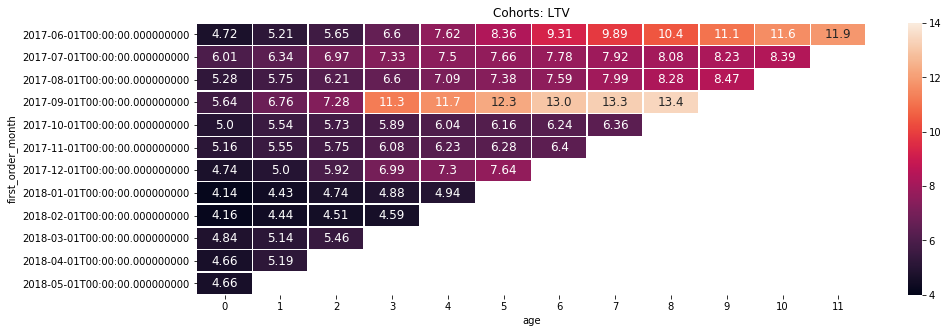

In [242]:
#Тепловая карта LTV 
plt.figure(figsize=(15,5))
plt.title('Cohorts: LTV')

sns.heatmap(ltv, 
            annot=True, 
            fmt='.3',
            vmax= 14, 
            vmin = 4,
            linewidths=.5,
            annot_kws={"size": 12})

In [223]:
#итоговый LTV первой когорты
ltv_201706 = ltv_pivot.loc['2017-06-01'].sum()
ltv_201706

11.88

В среднем каждый покупатель из первой когорты принес по 11.88 тыс. рублей  выручки за 11 месяцев жизни;  
По общей картине можно сказать, что средняя выручка от когорт варьируется по месяцам в большую и меньшую сторону. Независимо от того, что мало покупателей  возвращаются в последующие месяцы, выручка увеличивается.


#### 2.3 Маркетинг<a name="Шаг2.3"></a> 

##### 2.3.1 Расходы: всего / на каждый источник / по времени <a name="Шаг2.3.1"></a> 


In [55]:
#Сумма потраченных средств на рекламу за весь период
all_period = costs['costs'].sum()
all_period

329131.62

За весь период на рекламу потратили 329131.62 тыс. рублей

In [56]:
#Сумма потраченных средств на рекламу по каждому источнику
sours_costs = costs.groupby('source_id')['costs'].sum().reset_index()
sours_costs.sort_values(by = 'costs')

,source_id,costs
5,9,5517.49
6,10,5822.49
0,1,20833.27
1,2,42806.04
4,5,51757.10
3,4,61073.60
2,3,141321.63


Больше всего уходит на рекламу в источнике 3 - 141321.63 тыс. а меньше всего на источник 9, было бы логично, если бы источник 3 приносил больше всего покупателей. Проверим данные.

In [57]:
#Сумма потраченных средств на рекламу по месяцам
time_costs = costs.groupby('date_month')['costs'].sum()
time_costs.sort_values()

date_month
8     14790.54
6     18015.00
7     18240.59
5     22224.27
4     22289.38
9     24368.91
3     30415.27
2     32723.03
1     33518.52
10    36322.88
11    37907.88
12    38315.35
Name: costs, dtype: float64

Больше всего в рекламу вкладываются в зимние месяцы ~37907.88 в месяц, меньше всего в летние 14790.54 - 18015.00 в месяц, что варьируется с тем, что покупателей больше приходит зимой, чем летом.

##### 2.3.2 Стоимость привлечения одного покупателя из каждого источника<a name="Шаг2.3.2"></a> 


In [226]:
#Нахожу стоимость привлечения покупателей из каждого источника

rev_uid_costs_per_source['price_for_client'] = rev_uid_costs_per_source['costs']/rev_uid_costs_per_source['clients']

#Округляю значения
rev_uid_costs_per_source['price_for_client'] = rev_uid_costs_per_source['price_for_client'].round(3)

#Сортирую и привожу к табличному видц
rev_uid_costs_per_source['price_for_client'].sort_values().to_frame()

,price_for_client
index,
source 10,4.381
source 9,5.071
source 4,5.932
source 1,7.186
source 5,7.467
source 2,12.209
source 3,13.494


Больше всего денег уходит на привлечение одного покупателя по рекламным источникам 2 и 3, по данным источникам в среднем покупатель обходится в 12.8 тыс. руб.  
Самым бюджетным привлечение покупателей получается по источнику 10.

##### 2.3.3 Окупаемость расходов (ROI)<a name="Шаг2.3.3"></a> 

In [239]:
#Расчет общего ROI 
ROI = (rev_uid_costs_per_source['revenue'].sum() - rev_uid_costs_per_source['costs'].sum()) / rev_uid_costs_per_source['costs'].sum()

print('Окупаемость:',ROI)




Окупаемость: -0.23417877625976585


Затраты превышают выручку, расходы не окупились, бизнес в убытке.  

In [240]:
rev_uid_costs_per_source['roi'] = (rev_uid_costs_per_source['revenue'] - rev_uid_costs_per_source['costs']) / rev_uid_costs_per_source['costs']

rev_uid_costs_per_source.sort_values(by = 'roi')



,costs,revenue,uid,clients,source_profit,price_for_client,roi
index,,,,,,,
source 3,141321.63,54511.24,74756,10473.0,-86810.39,13.494,-0.614275
source 10,5822.49,4450.33,8067,1329.0,-1372.16,4.381,-0.235665
source 4,61073.60,56696.83,83525,10296.0,-4376.77,5.932,-0.071664
source 5,51757.10,52624.02,56974,6931.0,866.92,7.467,0.016750
source 9,5517.49,5759.40,9264,1088.0,241.91,5.071,0.043844
source 2,42806.04,46923.61,26245,3506.0,4117.57,12.209,0.096191
source 1,20833.27,31090.55,18999,2899.0,10257.28,7.186,0.492351


В разрезе источников видно, что источники 3,4, 10 убыточные, возможно сотрудничество с ними стоит прекратить.  
Больше всего окупился источник 1.

In [64]:
#Объединяю таблицы
visits_orders = orders.merge(visits, on = 'uid')
#Проверка возможных категорий устройств, используемых пользователями
visits_orders['device'].value_counts()

desktop    713192
touch       48615
Name: device, dtype: int64

In [65]:
#Окупаемость расходов по устройствам (desktop)
desctop_orders_filtered = visits_orders.query('device == "desktop"')


desktop_ROI = (desctop_orders_filtered['revenue'].sum() - costs['costs'].sum()) / costs['costs'].sum()
desktop_ROI

18.590624534950496

Высокий показатель окупаемости относительно общих показателей

In [66]:
#Окупаемость расходов по устройствам (touch)
touch_orders_filtered = visits_orders.query('device == "touch"')

touch_ROI = (touch_orders_filtered['revenue'].sum() - costs['costs'].sum()) / costs['costs'].sum()
touch_ROI

0.5626373424710759

Окупаемость присутствует, но гараздо меньше, в сравнении с desktop. Похоже с компьютеров люди все же чаще покупают билеты.

In [67]:
#Построение таблицы выручки по устройствам

#Сортировка покупателей по устройствам
visits_sorted = visits.sort_values(by='session_start')


# Сортировка выручки по устройствам
first_device_per_user = visits_sorted.groupby('uid').agg({'device': 'first'})
client_per_device = orders.merge(first_device_per_user, on='uid')
client_per_device = client_per_device.groupby('device').agg({'uid': 'nunique'})

# Поиск уникальных пользователей по устройствам
uid_per_device = visits_sorted.groupby('device').agg({'uid': 'nunique'})

#Присоединение таблицы и группировка по доходам
rev_per_device = orders.merge(first_device_per_user, on='uid')
rev_per_device = rev_per_device.groupby('device').agg({'revenue': 'sum'})

#Объединяю таблицы
rev_uid_per_device = pd.concat([rev_per_device, 
                                      uid_per_device, client_per_device],axis=1).fillna(0)

rev_uid_per_device = rev_uid_per_device

rev_uid_per_device.columns = ['revenue', 'uid', 'clients']

rev_uid_per_device

,revenue,uid,clients
device,,,
desktop,211329.77,164523,29211
touch,40727.43,71345,7312


По полученным данным видно, что через компьютеры на сайте покупают чаще, чем через мобильные устройства, больше клиентов и больше прибыль (211329.77 принесли компьютеры и 40727.43 мобильные устройства).

In [68]:
#Построение таблицы выручки и затрат по источникам

#Сортировка выручки по источникам

costs_per_source = costs.groupby('source_id').agg({'costs': 'sum'})

# выручка по источникам
first_source_per_user = visits_sorted.groupby('uid').agg({'source id': 'first'})
client_per_source = orders.merge(first_source_per_user, on='uid')
client_per_source = client_per_source.groupby('source id').agg({'uid': 'nunique'})

# Поиск уникальных пользователей по источникам
uid_per_source = visits_sorted.groupby('source id').agg({'uid': 'nunique'})

#Присоединение таблицы и группировка по доходам
rev_per_source = orders.merge(first_source_per_user, on='uid')
rev_per_source = rev_per_source.groupby('source id').agg({'revenue': 'sum'})

#Объединяю таблицы
rev_uid_costs_per_source = pd.concat([costs_per_source, rev_per_source, 
                                      uid_per_source, client_per_source],axis=1).fillna(0)

#Ставлю на места индексов источники
rev_uid_costs_per_source = rev_uid_costs_per_source.reset_index()
rev_uid_costs_per_source['index'] = 'source ' + rev_uid_costs_per_source['index'].astype('str')
rev_uid_costs_per_source = rev_uid_costs_per_source.set_index('index')
rev_uid_costs_per_source.columns = ['costs', 'revenue', 'uid', 'clients']

#Убераю лишние индексы
rev_uid_costs_per_source = rev_uid_costs_per_source.drop(['source 6', 'source 7'])
rev_uid_costs_per_source

,costs,revenue,uid,clients
index,,,,
source 1,20833.27,31090.55,18999,2899.0
source 2,42806.04,46923.61,26245,3506.0
source 3,141321.63,54511.24,74756,10473.0
source 4,61073.60,56696.83,83525,10296.0
source 5,51757.10,52624.02,56974,6931.0
source 9,5517.49,5759.40,9264,1088.0
source 10,5822.49,4450.33,8067,1329.0


In [69]:
#Чистая прибыль по источникам
rev_uid_costs_per_source['source_profit'] = rev_uid_costs_per_source['revenue'] - rev_uid_costs_per_source['costs']

rev_uid_costs_per_source

,costs,revenue,uid,clients,source_profit
index,,,,,
source 1,20833.27,31090.55,18999,2899.0,10257.28
source 2,42806.04,46923.61,26245,3506.0,4117.57
source 3,141321.63,54511.24,74756,10473.0,-86810.39
source 4,61073.60,56696.83,83525,10296.0,-4376.77
source 5,51757.10,52624.02,56974,6931.0,866.92
source 9,5517.49,5759.40,9264,1088.0,241.91
source 10,5822.49,4450.33,8067,1329.0,-1372.16


Источники 3,4 и 10 убыточные. а вот к источникам 1 и 2 стоит присмотреться, они приносят наиболее большой профит (10257.28 и 4117.57 тыс. р. соответственно)

#### Вывод: <a name="Шаг2.4"></a>   
  
#### Продукт  

**Количество пользователей в день, неделю, месяц**    
Количество пользователей в день: 907  
Количество пользователей в неделю: 5716  
Количество пользователей в месяц: 23228
  
**Количество сессий в день**    
Количество сессий в день приближено к количеству пользователей в день, похоже, чаще всего пользователи заходят на сайт по одному разу, либо никак не авторизуются и каждый последующий заход на сайт пользователю присваивается новый uid.  
  
**Длительность одной сессии**  
Минимальная длительность сессии -1 days +23:14:00, похоже на ошибку в программе регистрации начала и окончания сессии;
В среднем на сайте проводят 10 минут.  
  
**Как часто люди возвращаются**
Тепловая карта показывает, что пользователи практически не возвращаются, лишь 5-7 % пользователей заходят на сайт через месяц после первой активности, возможно, это связано с тем;  
После второго месяца возвращается примерно тоже количество людей и лишь после продолжительного времени процент вернувшихся пользователей падает до 2 - 2.75; Стоит заметить, что первая когорта показывает наилучший результат среди прочих; Как и было ранее отмечено, больше всего пользователей приходят в период с августа по ноябрь.  
  
####   Продажи   
  
**Когда люди начинают покупать?**  
В среднем от визита до покупки проходит 16 дней 21 час 40 минут, минимум - 0, вероятно, ошибка в записи данных;
Медианное значение - 16 минут;  
Дольше всех покупатель совершал покупку почти год - 363 дня.  
  
**Количество покупок за период**  
В среднем в день покупают 138 раз, в неделю 969 и 4201 в месяц;  
Максимальное количество покупок в день 814, в неделю 1894 и 6218 в месяц.  
  
**Средний чек за месяц**  
Средний чек в месяц равен 4.95 тыс. рублей.  
  
**Сколько денег приносят? (LTV)**   
В среднем каждый покупатель из первой когорты принес по 11.88 тыс. рублей выручки за 11 месяцев жизни;    
По общей картине можно сказать, что средняя выручка от когорт варьируется по месяцам в большую и меньшую сторону. Независимо от того, что мало покупателей возвращаются в последующие месяцы, выручка увеличивается.  
  
####  Маркетинг  

**Сколько денег потратили? Всего / на каждый источник / по времени**   
За весь период на рекламу потратили 329131.62 тыс. рублей;  
Больше всего уходит на рекламу в источнике 3 - 141321.63 тыс. а меньше всего на источник 9, было бы логично, если бы источник 3 приносил больше всего покупателей. Проверим данные;  
Больше всего в рекламу вкладываются в зимние месяцы ~37907.88 в месяц, меньше всего в летние 14790.54 - 18015.00 в месяц, что варьируется с тем, что покупателей больше приходит зимой, чем летом.  
  
**Стоимость привлечения одного покупателя из каждого источника**  
Больше всего денег уходит на привлечение одного покупателя по рекламным источникам 2 и 3, по данным источникам в среднем покупатель обходится в 12.8 тыс. руб.  
Самым бюджетным привлечение покупателей получается по источнику 10. 
  
**На сколько окупились расходы? (ROI)**  
Окупаемость = -0.234, что затраты превышают выручку, бизнес находится в убытке. Расходы не окупились.    
 



### Шаг 3. Вывод: рекомендации маркетологам, куда и сколько стоит вкладывать денег <a name="Шаг3"></a> 

#### Продукт  
  
**Количество пользователей в день, неделю, месяц**    
Количество пользователей в день: 907  
Количество пользователей в неделю: 5716  
Количество пользователей в месяц: 23228
  
**Количество сессий в день**    
Количество сессий в день приближено к количеству пользователей в день, похоже, чаще всего пользователи заходят на сайт по одному разу, либо никак не авторизуются и каждый последующий заход на сайт пользователю присваивается новый uid.  
  
**Длительность одной сессии**  
Минимальная длительность сессии -1 days +23:14:00, похоже на ошибку в программе регистрации начала и окончания сессии;
В среднем на сайте проводят 10 минут.  
  
**Как часто люди возвращаются**
Тепловая карта показывает, что пользователи практически не возвращаются, лишь 5-7 % пользователей заходят на сайт через месяц после первой активности, возможно, это связано с тем;  
После второго месяца возвращается примерно тоже количество людей и лишь после продолжительного времени процент вернувшихся пользователей падает до 2 - 2.75; Стоит заметить, что первая когорта показывает наилучший результат среди прочих; Как и было ранее отмечено, больше всего пользователей приходят в период с августа по ноябрь.  
  
####   Продажи   
  
**Когда люди начинают покупать?**  
В среднем от визита до покупки проходит 16 дней 21 час 40 минут, минимум - 0, вероятно, ошибка в записи данных;
Медианное значение - 16 минут;  
Дольше всех покупатель совершал покупку почти год - 363 дня.  
  
**Количество покупок за период**  
В среднем в день покупают 138 раз, в неделю 969 и 4201 в месяц;  
Максимальное количество покупок в день 814, в неделю 1894 и 6218 в месяц.  
  
**Средний чек за месяц**  
Средний чек в месяц равен 4.95 тыс. рублей.  
  
**Сколько денег приносят? (LTV)**   
В среднем каждый покупатель из первой когорты принес по 11.88 тыс. рублей выручки за 11 месяцев жизни;    
По общей картине можно сказать, что средняя выручка от когорт варьируется по месяцам в большую и меньшую сторону. Независимо от того, что мало покупателей возвращаются в последующие месяцы, выручка увеличивается.  
  
####  Маркетинг  

**Сколько денег потратили? Всего / на каждый источник / по времени**   
За весь период на рекламу потратили 329131.62 тыс. рублей;  
Больше всего уходит на рекламу в источнике 3 - 141321.63 тыс. а меньше всего на источник 9, было бы логично, если бы источник 3 приносил больше всего покупателей. Проверим данные;  
Больше всего в рекламу вкладываются в зимние месяцы ~37907.88 в месяц, меньше всего в летние 14790.54 - 18015.00 в месяц, что варьируется с тем, что покупателей больше приходит зимой, чем летом.  
  
**Стоимость привлечения одного покупателя из каждого источника**  
Больше всего денег уходит на привлечение одного покупателя по рекламным источникам 2 и 3, по данным источникам в среднем покупатель обходится в 12.8 тыс. руб.  
Самым бюджетным привлечение покупателей получается по источнику 10.  
  
**На сколько окупились расходы? (ROI)**  
Окупаемость = -0.234, что затраты превышают выручку, бизнес находится в убытке. Расходы не окупились.   

Источники 3,4, 10 убыточные, возможно сотрудничество с ними стоит прекратить.
Больше всего окупился источник 1.

По полученным данным видно, что через компьютеры на сайте покупают чаще, чем через мобильные устройства, больше клиентов и больше прибыль (211329.77 принесли компьютеры и 40727.43 мобильные устройства).

Источники 3,4 и 10 убыточные, как уже быть отмечено по результатам CAC, а вот к источникам 1 и 2 стоит присмотреться, они приносят наиболее большой профит (10257.28 и 4117.57 тыс. р. соответственно)


**Рекомендации по платформам:**  
  
С учетом всего вышеизложенного стоит присмотреться к **рекламе для ПК версии**, поскольку через компьютеры приходит в 5 раз больше денег, а соответственно и покупателей, чем через мобильные устройства.   


**Рекомендации по источникам:** 

Исходя из того, что источники 3,4 одни из самых дорогостоящих по привлечению клиентов, но это дороговизна себя не окупает, от них стоит **отказаться**, также как и от источника 10, так как несмотря на дешевизну привлечения одного покупателя, источник себя не окупает. А вот источники 1,2 наоборот стоит **привлекать чаще**, ведь прибыль от них наибольшая, также можно продолжить сотрудничать с источниками 5, 9, поскольку прибыль они все же приносят, но не такую существенную. Выбираю из источников 5 и 9 стоит сделать акцент на источнике 9, поскольку стоимость привлечения одного покупателя у него самая низкая.